# Volume estimates
Watanabe and Yoshida introduced in [WY05] a technique to find lower bounds for the Hilbert–Kunz multiplicity of rings as a function of certain constants of the ring. This fascinating technique was sucessful in the case of dimension 3 and 4, and Aberbach and Enescu in [AE12] pushed it further to solve dimension 5 and 6. Recently, in 2023, Aberbach and Cox-Steib refined a new technique that was able to provide bounds sharp enough to crack dimension 7, and they claim that this technique has been possible to push further to higher dimensional, high multiplicity cases.

In this Jupyter Notebook, there are certain volume estimates to play with and check. Also, there is a cell showing how Aberbach and Enescu's improved lower estimate cannot be used in dimension 7.

These volume estimates use the following function:

**Definition.** $v_s=...$

**Theorem.** According to Aberbach and Enescu (Section 3 of [AE12]),
$$
v_s = \sum_{n=0}^{\lfloor s\rfloor} (-1)^n \frac{(s-n)^d}{n!(d-n)!}
$$

## Watanabe and Yoshida's volume estimate
Watanabe and Yoshida provide the following theorem:
**Theorem.**

The following cell shows values of Watanabe and Yoshida's volume estimates in dimension 4, and why $s=2$ is just fine, if you compare it with the line that represents the Hilbert–Kunz multiplicity of $R_{3,4}$

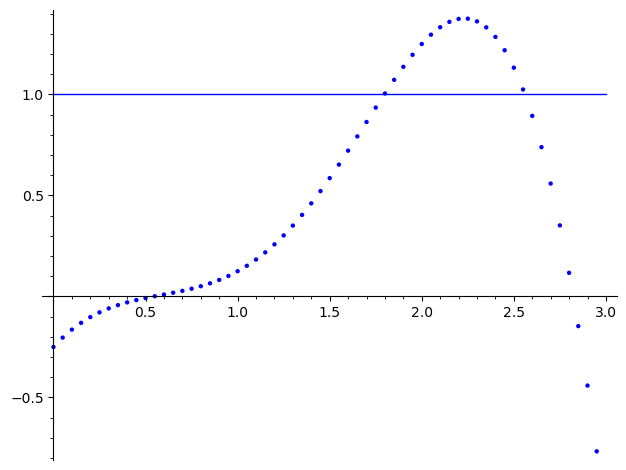

In [275]:
d = 4
e = 3
a = 20
r = e-1
def v(d,s):
    return sum((-1)^n*(s-n)^d/(factorial(n)*factorial(d-n)) for n in range(floor(s)+1))
s0 = 2.1
e*(v(d,s0)-r*(s0-1)^d/factorial(d)),float(7/3)
points([(s/a,e*(v(d,s/a)-r*(s/a-1)^d/factorial(d))) for s in range(0,a*3)])+line([(0,1),(3,1)])

## Aberbach and Enescu's volume estimates.

**Theorem.** ...

The following cell shows how in dimension 6, the Hilbert–Kunz multiplicity of the $A_1$ and $A_2$ singularities in characteristic 2 are well below Aberbach and Enescu's volume estimates. However, the bounds they give are not so sharp, and they fall short for the value in characteristic 2.

The function max_G(e) is a function that to each $e$ and dimension $d$ associates the best volume estimate (up to a certain precision granted by the parameter $a$).

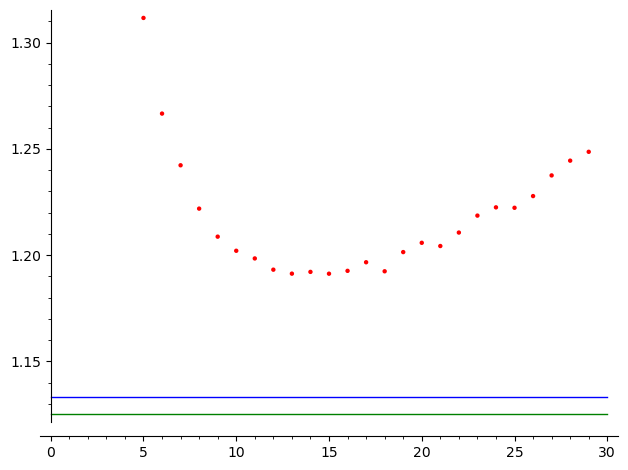

In [276]:
def max_G(e,d): # See definition in Aberbach and Enescu's 2012 paper.
    '''
    This function takes the G(e) values and computes an approximate maximum.
    a is simply a subdivision of the interval of values. Increase to get
    ever more precise values.
    '''
    a = 15
    l = [e*(v(d,s/a)-(e-2)*v(d,s/a-1)) for s in range(0,a*6)]
    m = max(l)
    return (e,m)
d = 6
points([max_G(e,d) for e in range(5,30)],color='red')+line([(0,1.125),(30,1.125)],color='green')+line([(0,17/15),(30,17/15)],color='blue')

The cell below is the plot of the volume estime given by Aberbach–Enescu, 2012, as a function on $s$ for the case of dimension 7 and multiplicity 6, and the line representing the value of the Hilbert–Kunz multiplicity of the quadric of dimension 7 and characteristic 2. It is not enough for us: as you can see, for every $s$, the volume estimate is smaller than the value we want it to exceed... And even if you compare it with that value but for characteristic 3, the volume estimate is still short! That is why Aberbach and Cox-Steib did new things.

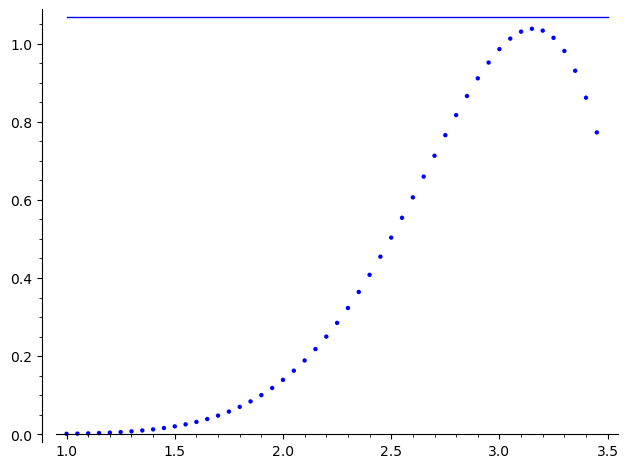

In [277]:
d = 7
e = 6
a = 20
point([(s/a,e*(v(d,s/a)-(e-2)*v(d,s/a-1))) for s in range(20,70)])+line([(1,16/15),(3.5,16/15)])